# Выявление закономерностей, определяющих успешность компьютерной игры

Мы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.


В наборе данных попадается аббревиатура *ESRB (Entertainment Software Rating Board)* — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Изучение общей информации о данных

In [1]:
# сразу импортируем все необходимые в будущем библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st 
import seaborn as sns

In [2]:
# считываем и записываем в переменную полученный .csv файл

df = pd.read_csv('/datasets/games.csv')

In [3]:
# выводм общую информацию о файле

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# выводим первые 10 строк датасета

df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Информация о столбцах датасета:**

* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Вывод**

Как можем видеть, большая часть данных имеет надлежащий вид, таблица имеет малое количество пропусков, которые, предположительно, мало повлияют на дальнейшую работу с датасетом.

## Предобработка данных

In [5]:
# для начала приведём названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()

df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Обработаем значени `tbd`, затем переведём параметр в численный тип данных и заполним пропуски медианными значениями.

In [7]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'] = df['user_score'].astype(float)

df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [8]:
df['user_score'] = df.groupby('genre', sort=False)['user_score'].apply(lambda x: x.fillna(x.mean()))
print(df.groupby('genre').agg({'user_score':np.mean}))
print(df['user_score'].head(10))

              user_score
genre                   
Action          7.054044
Adventure       7.133000
Fighting        7.302506
Misc            6.819362
Platform        7.301402
Puzzle          7.175000
Racing          7.036193
Role-Playing    7.619515
Shooter         7.041883
Simulation      7.134593
Sports          6.961197
Strategy        7.295177
0    8.000000
1    7.301402
2    8.300000
3    8.000000
4    7.619515
5    7.175000
6    8.500000
7    6.600000
8    8.400000
9    7.041883
Name: user_score, dtype: float64


In [9]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.000000,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,7.301402,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.300000,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.000000,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,7.619515,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,7.175000,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.500000,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.600000,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.400000,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,7.041883,NaN


### Обработка пропусков

In [10]:
# посчитаем сколько всего пропусков в каждом параметре

df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score            2
rating             6766
dtype: int64

Стоит предположить, что большое число пропусков в параметрах оценки игры и её рейтинга обосновано значительной частью игр, которые были выпущенны до создания рейтинговой и оценочной системы. По этой причине, для упрощения дальнейшей работы, заполним параметр оценки критиков медианным значением, а пропуски рейтинга `NO`.

In [11]:
df['critic_score'] = df.groupby('genre', sort=False)['critic_score'].apply(lambda x: x.fillna(x.mean()))
df['rating'] = df['rating'].fillna('NO')
df.isna().sum()

name                 2
platform             0
year_of_release    269
genre                2
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         0
user_score           2
rating               0
dtype: int64

In [12]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.000000,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,71.0,7.301402,NO
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.300000,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.000000,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.619515,NO
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,71.0,7.175000,NO
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.500000,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.600000,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.400000,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,71.0,7.041883,NO


Учитывая процент пропусков в параметрах названия и года выпуска игры, а именно:

In [13]:
print(df['name'].isna().sum() / len(df) * 100)
df['year_of_release'].isna().sum() / len(df) * 100

0.011965300628178284


1.609332934489979

По этой причине можем избавиться от сток с пропуском этих параметров по причине, что в дальнейшем он будет иметь большую роль в исследовании, а количество пропусков позволяет избавиться от сток без потери информативности и достоверности датасета.

In [14]:
df = df[df['year_of_release'].notna()]
df = df[df['genre'].notna()]

In [15]:
# заменим тип данных параметра 'year_of_release' на целочисленный
df['year_of_release'] = df['year_of_release'].astype('int')

In [16]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Дополнительные рассчеты

In [18]:
# рассчитаем сумму продаж копий во всех регионах в новый параметр 'all_sales'

df.insert(8, 
          'all_sales',
          df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
         )

df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.000000,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,71.0,7.301402,NO
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.300000,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.000000,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,71.0,7.619515,NO
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,30.26,71.0,7.175000,NO
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,29.80,89.0,8.500000,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,28.91,58.0,6.600000,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,28.32,87.0,8.400000,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,28.31,71.0,7.041883,NO


## Исследовательский анализ

<AxesSubplot:xlabel='year_of_release'>

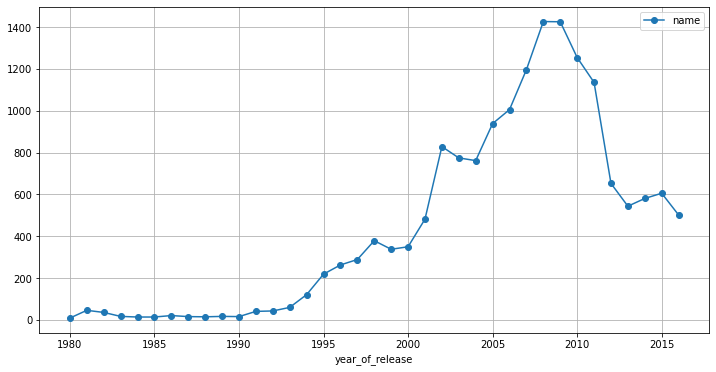

In [19]:
(
    df
    .pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(
        style='-o',
        grid=True, 
        figsize=(12, 6))
)

Как можем заметить, вплоть до 2014 года наблюдался значительный низходящий тренд по количеству выпускаемых игр. Есть предположение, что в исследовании наиболее актуальным периодом будет `13-16 года`.

<AxesSubplot:xlabel='platform'>

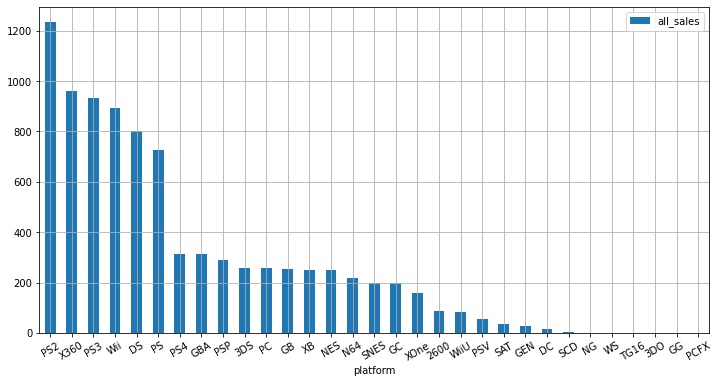

In [20]:
(
    df
    .pivot_table(index='platform', values='all_sales', aggfunc='sum')
    .sort_values(by='all_sales', ascending=False)
    .plot.bar(
    grid=True, 
    figsize=(12, 6),
    rot=30)
)

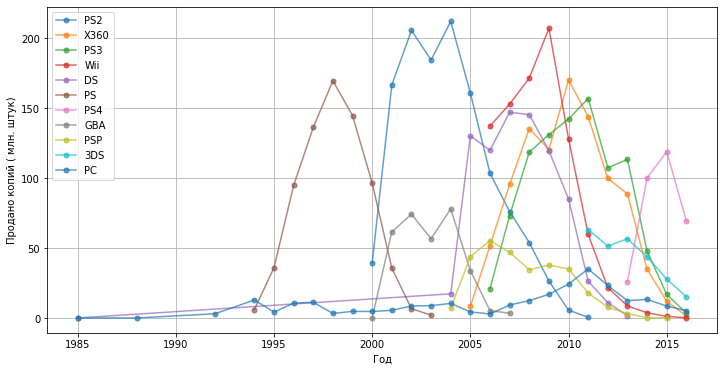

In [21]:
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS', 'PC']
for i in platforms:
    df.query('platform == @i').groupby('year_of_release')['all_sales'].sum().plot(label = i,
                                                                                   style = '-o',
                                                                                   legend = True,
                                                                                   xlabel = 'Год',
                                                                                   ylabel = 'Продано копий ( млн. штук)',
                                                                                   grid = True,
                                                                                   alpha = 0.7,
                                                                                   figsize = (12, 6),
                                                                                   markersize = 5
                                                                                   )

Как можем заметить по графику, средний срок  жизни одной платформы около 10 лет. Однако, единственная платформа, сохраняющая продажи на протяжении всего графика - ПК. 

Так же по графику мы можем видеть уже ранее иллюстрированный на предыдущем графике спад продаж. *За актуальный период решено взять срок `с 2013 по 2016` года.*

### Анализ актуального периода

In [22]:
# отсекаем актуальный период из датасета, записываем его в новую переменную

actual_df = df.query('year_of_release >= 2013').reset_index(drop=True)

print(len(actual_df))
actual_df.head(10)

2233


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score,rating
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,21.05,97.0,8.200000,M
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,16.27,97.0,8.100000,M
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63,71.0,7.041883,NO
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,14.60,71.0,7.619515,NO
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,12.62,97.0,8.300000,M
5,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,11.68,71.0,7.619515,NO
6,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,10.24,73.0,2.600000,M
7,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,9.36,71.0,2.600000,M
8,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,9.18,71.0,6.819362,NO
9,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,8.58,82.0,4.300000,E


<AxesSubplot:xlabel='platform'>

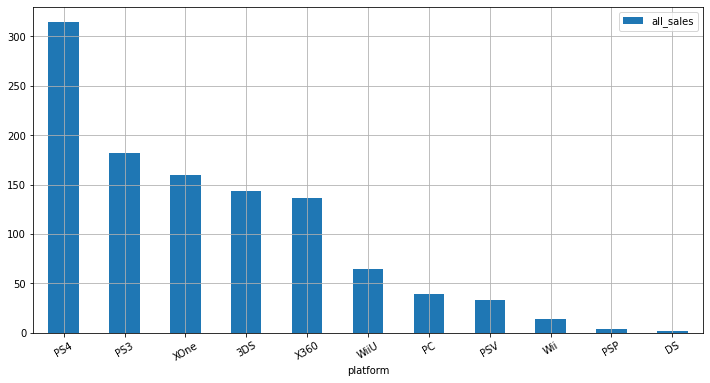

In [23]:
(
    actual_df
    .pivot_table(index='platform', values='all_sales', aggfunc='sum')
    .sort_values(by='all_sales', ascending=False)
    .plot.bar(
    grid=True, 
    figsize=(12, 6),
    rot=30)
)

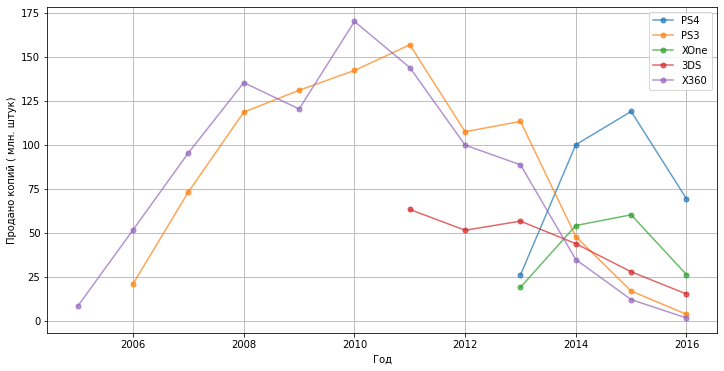

In [24]:
platforms = ['PS4', 'PS3', 'XOne', '3DS', 'X360']
for i in platforms:
    df.query('platform == @i').groupby('year_of_release')['all_sales'].sum().plot(label = i,
                                                                                   style = '-o',
                                                                                   legend = True,
                                                                                   xlabel = 'Год',
                                                                                   ylabel = 'Продано копий ( млн. штук)',
                                                                                   grid = True,
                                                                                   alpha = 0.7,
                                                                                   figsize = (12, 6),
                                                                                   markersize = 5
                                                                                   )

Анализируя график и беря во внимание продажи предыдущих платформ, можно сказать, что наибольший потенциал, из представленных, представляю `PS4`, `XOne` и `3DS` по нескольким факторам:
* Средний срок жизни одной платформы - 10 лет. Старшей из представленных - 5 лет.
* После первого года спада продаж, которые наблюдались у всех предыдущих поколений платформ, наблюдался восстановительный рост. Именно первый год спада мы можем видеть у `XOne` и `PS4`.

В качестве подтверждения теории и дополнительного анализа, возьмём на дальнейшее рассмотрение такие платформы, как: `PS3` и `X360`. Убедившись на диаграмме размаха в их перспективности.

[Text(0.5, 1.0, 'Диаграмма'),
 Text(0.5, 0, 'Топ перспективных платформ'),
 (0.0, 1.5)]

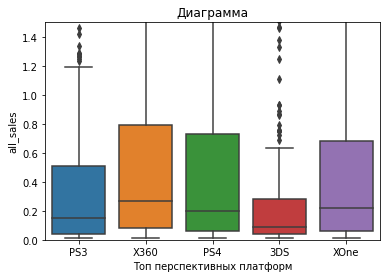

In [25]:
top_platforms = ['PS4', 'XOne', '3DS', 'PS3', 'X360']
top_df = actual_df.query('platform == @top_platforms')

sns.boxplot(data = top_df, y ='all_sales', x='platform').set(title = 'Диаграмма', 
                                                             xlabel = 'Топ перспективных платформ', 
                                                             ylim=(0, 1.5))

[Text(0.5, 1.0, 'Диаграмма'),
 Text(0.5, 0, 'Топ перспективных платформ'),
 (0.0, 6.0)]

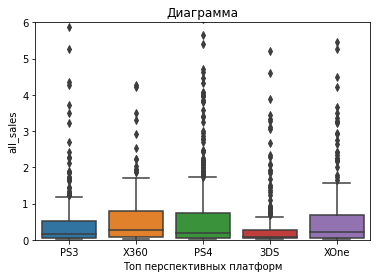

In [26]:
sns.boxplot(data = top_df, y ='all_sales', x='platform').set(title = 'Диаграмма', 
                                                             xlabel = 'Топ перспективных платформ', 
                                                             ylim=(0, 6))

Как можем заметить, платформа `X360` вопреки теории, имеет самые высокие нижне-нормальную, медианную и высоко-нормальную планки, что говорит о потенциале платформы и в след.году. Платформа `PS3` не оправдала свои позиции. Не смотря на низкие продажи платформы `3DS`, стоит учитывать её относительную юность, что даёт перспективы на следующие года.  

В итоге у нас остаётся 4 платформы: `X360`, `PS4`, `XOne` и `3DS`.

### Зависимость продаж от оценок

In [27]:
top_platforms = ['PS4', 'XOne', '3DS', 'X360']
top_df = actual_df.query('platform == @top_platforms')

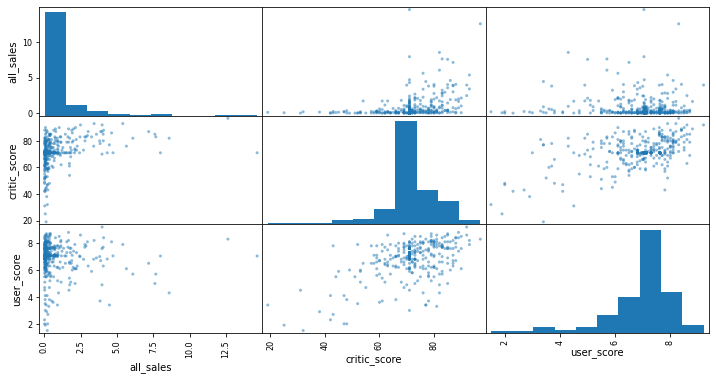

In [28]:
pd.plotting.scatter_matrix(
    top_df.query('platform == "PS4"')[['all_sales', 'critic_score', 'user_score']], 
    figsize=(12, 6));

In [29]:
top_df.query('platform == "PS4"')[['all_sales', 'critic_score', 'user_score']].corr()

,all_sales,critic_score,user_score
all_sales,1.000000,0.338706,-0.050876
critic_score,0.338706,1.000000,0.525668
user_score,-0.050876,0.525668,1.000000


Как можем заметить, на топовой платформе актуального периода `PS4` довольно слабо прослеживается корреляция и зависимость продаж от оценок. А если быть точнее, то она практически отсутствует.
Проанализируем остальные платформы и общую картину:

In [30]:
top_df.query('platform == "XOne"')[['all_sales', 'critic_score', 'user_score']].corr()

,all_sales,critic_score,user_score
all_sales,1.000000,0.360451,-0.088882
critic_score,0.360451,1.000000,0.394593
user_score,-0.088882,0.394593,1.000000


In [31]:
top_df.query('platform == "X360"')[['all_sales', 'critic_score', 'user_score']].corr()

,all_sales,critic_score,user_score
all_sales,1.000000,0.285467,-0.040510
critic_score,0.285467,1.000000,0.334116
user_score,-0.040510,0.334116,1.000000


In [32]:
top_df.query('platform == "3DS"')[['all_sales', 'critic_score', 'user_score']].corr()

,all_sales,critic_score,user_score
all_sales,1.000000,0.103681,0.137298
critic_score,0.103681,1.000000,0.543291
user_score,0.137298,0.543291,1.000000


In [33]:
top_df[['all_sales', 'critic_score', 'user_score']].corr()

,all_sales,critic_score,user_score
all_sales,1.000000,0.281408,-0.029427
critic_score,0.281408,1.000000,0.432109
user_score,-0.029427,0.432109,1.000000


**Вывод**

Как можем заметить, как на самой топовой платформе, так и на всех остальных, практически отсутствует корреляция продаж с оценками критиков и пользователей.

Сравним эти показатели с остальными платформами, не входящими в ТОП. Возьмём во внимание 4 другие платформы: `WiiU`, `PC`, `PSV`, `Wii`

,all_sales,critic_score,user_score
all_sales,1.000000,0.331536,0.375058
critic_score,0.331536,1.000000,0.616320
user_score,0.375058,0.616320,1.000000


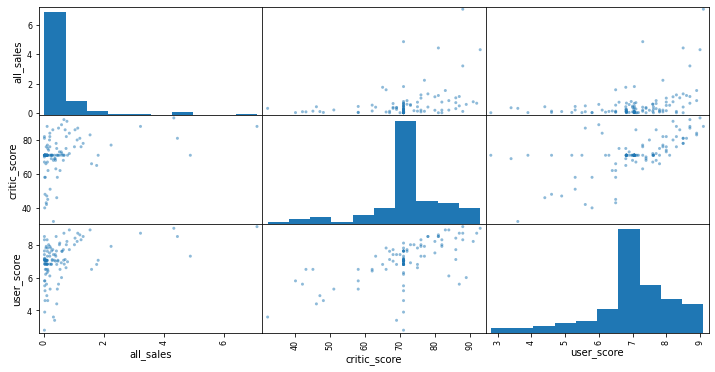

In [34]:
pd.plotting.scatter_matrix(
    actual_df.query('platform == "WiiU"')[['all_sales', 'critic_score', 'user_score']], 
    figsize=(12, 6))

actual_df.query('platform == "WiiU"')[['all_sales', 'critic_score', 'user_score']].corr()

**Вывод**

Как можем заметить, зависимость так же слаба.

,all_sales,critic_score,user_score
all_sales,1.000000,0.207805,-0.109208
critic_score,0.207805,1.000000,0.367982
user_score,-0.109208,0.367982,1.000000


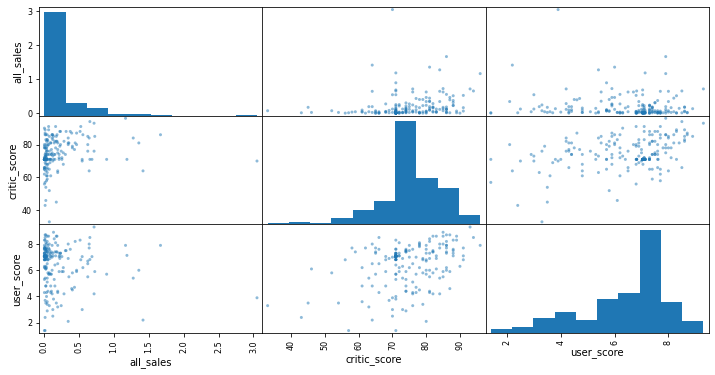

In [35]:
pd.plotting.scatter_matrix(
    actual_df.query('platform == "PC"')[['all_sales', 'critic_score', 'user_score']], 
    figsize=(12, 6))

actual_df.query('platform == "PC"')[['all_sales', 'critic_score', 'user_score']].corr()

**Вывод**

Аналогичная ситуация, однако портрет больше похож на корреляции ТОПовой платформы.

,all_sales,critic_score,user_score
all_sales,1.000000,0.149858,0.075706
critic_score,0.149858,1.000000,0.297332
user_score,0.075706,0.297332,1.000000


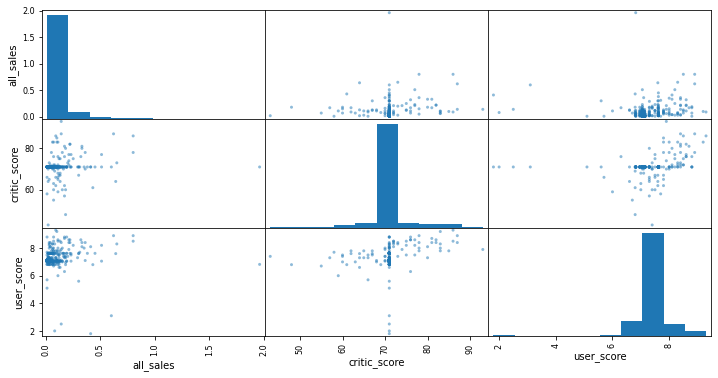

In [36]:
pd.plotting.scatter_matrix(
    actual_df.query('platform == "PSV"')[['all_sales', 'critic_score', 'user_score']], 
    figsize=(12, 6))

actual_df.query('platform == "PSV"')[['all_sales', 'critic_score', 'user_score']].corr()

**Вывод**

Корреляция так же практически отсутствует. Однако, здесь отчётливо видно, что оценка критиков оказывает в 2 раз сильнее влияние, чем оценка пользователей.

,all_sales,critic_score,user_score
all_sales,1.000000,0.202858,-0.061843
critic_score,0.202858,1.000000,0.292891
user_score,-0.061843,0.292891,1.000000


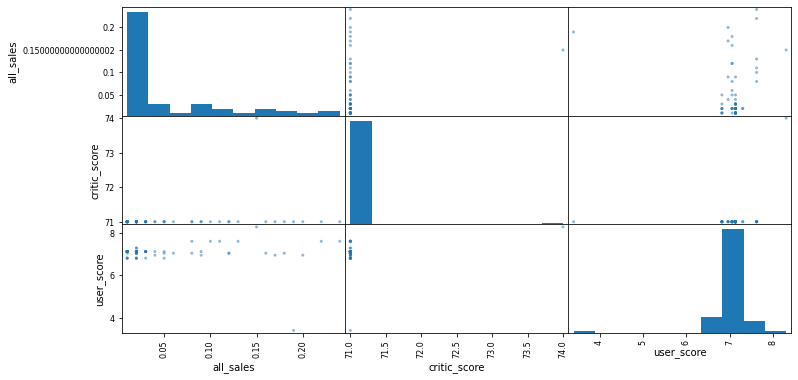

In [37]:
pd.plotting.scatter_matrix(
    actual_df.query('platform == "PSP"')[['all_sales', 'critic_score', 'user_score']], 
    figsize=(12, 6))

actual_df.query('platform == "PSP"')[['all_sales', 'critic_score', 'user_score']].corr()

**Вывод**

Аналогичная ситуация. Можно с уверенностью сказать, что если объём продаж и имеет какую-то корреляция с оценками пользователей и критиков, то она крайне мала. И это правило действует как и на ТОПовые платформы, так и на все остальные.

### Влияние жанров

<AxesSubplot:xlabel='genre'>

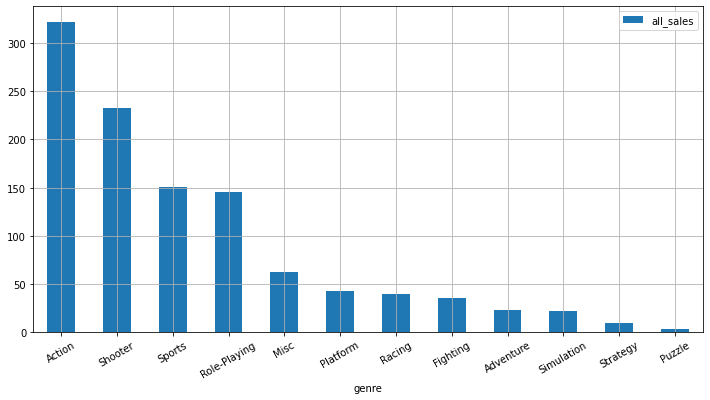

In [38]:
(
    actual_df
    .pivot_table(index='genre', values='all_sales', aggfunc='sum')
    .sort_values(by='all_sales', ascending=False)
    .plot.bar(
    grid=True, 
    figsize=(12, 6),
    rot=30)
)

[Text(0.5, 1.0, 'Диаграмма'),
 Text(0.5, 0, 'Топ жанров по продажам'),
 (0.0, 2.0)]

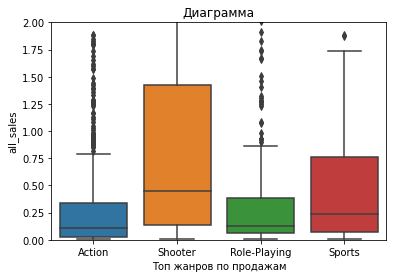

In [39]:
top_genre = ['Action', 'Shooter', 'Sports', 'Role-Playing']
top_genre_df = actual_df.query('genre == @top_genre')

sns.boxplot(data = top_genre_df, y ='all_sales', x='genre').set(title = 'Диаграмма', 
                                                             xlabel = 'Топ жанров по продажам', 
                                                             ylim=(0, 2))

[Text(0.5, 1.0, 'Диаграмма'),
 Text(0.5, 0, 'Топ жанров по продажам'),
 (0.0, 4.0)]

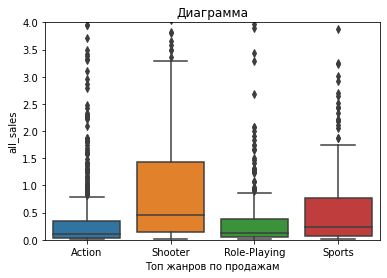

In [40]:
sns.boxplot(data = top_genre_df, y ='all_sales', x='genre').set(title = 'Диаграмма', 
                                                             xlabel = 'Топ жанров по продажам', 
                                                             ylim=(0, 4))

In [41]:
top4_genre = ['Action', 'Shooter', 'Sports', 'Role-Playing']
actual_df.query('genre == @top4_genre')['all_sales'].sum() / actual_df['all_sales'].sum()

0.7805976033520066

Как можем заметить, больше всего выделяются первые 4 жанра: `action`, `shooter`, `sports`, `role-playing`, которые в сумме составляют почти *80%* рынка игр. Однако несмотря на большой объём продаж экшн-игр, более стабильным и высокодоходным жанром можно считать шутеры, медиана которых находится на равне с 50 квартилем экшн-игр.

## Портреты пользователей по регионам

### Топ платформ по регионам

In [42]:
# содаём для будущего subplots() сводные таблицы по каждому из регионов
na_sales = actual_df.pivot_table(index='platform', values='na_sales', aggfunc='sum')
na_sales = na_sales.sort_values(by='na_sales', ascending=False).reset_index()

eu_sales = actual_df.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
eu_sales = eu_sales.sort_values(by='eu_sales', ascending=False).reset_index()

jp_sales = actual_df.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
jp_sales = jp_sales.sort_values(by='jp_sales', ascending=False).reset_index()

Text(0.5, 1.0, 'Распределение продаж\nпо платформам в Японии')

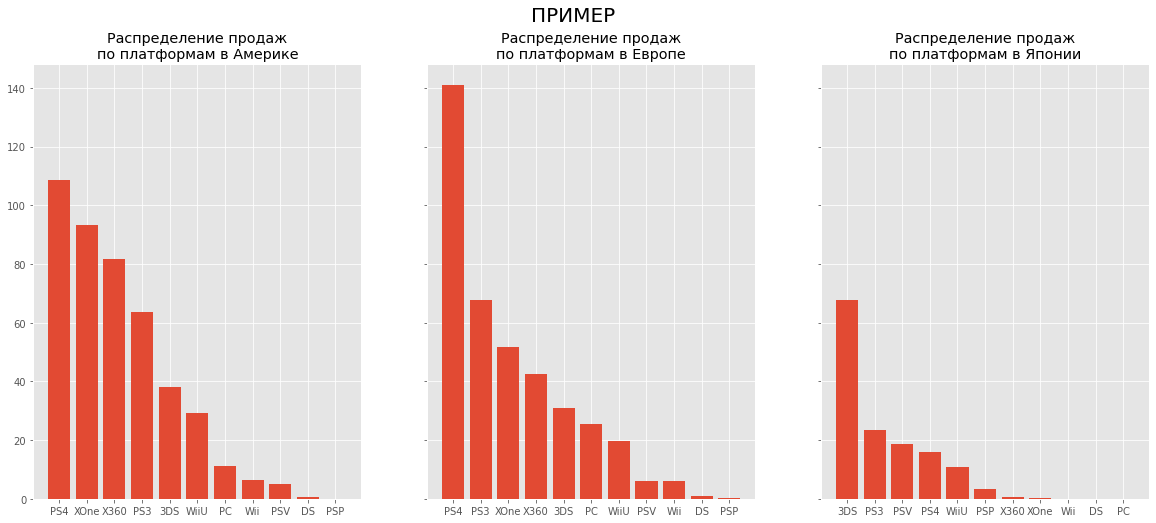

In [43]:
plt.style.use('ggplot')

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 8), sharey=True)
plt.suptitle('ПРИМЕР', fontsize = 20)
# ax.get_figure().suptitle("ЫПА")

ax1.bar(na_sales['platform'], na_sales['na_sales'])
ax1.set_title('Распределение продаж\nпо платформам в Америке')

ax2.bar(eu_sales['platform'], eu_sales['eu_sales'])
ax2.set_title('Распределение продаж\nпо платформам в Европе')

ax3.bar(jp_sales['platform'], jp_sales['jp_sales'])
ax3.set_title('Распределение продаж\nпо платформам в Японии')

**Вывод**

Как можем заметить, ТОП рынка Америки и Европы занимает `PS4`. Однако, в Америке с этой платформой сравнялась `XOne`, в то время как в Европе она уходит с большим отрывом.

В Японии же огромную часть рынка берёт на себя `3DS`, оставляя остальные платформы в аутсайдерах.

### Топ жанров по регионам

In [44]:
# содаём для будущего subplots() сводные таблицы по каждому из регионов
na_sales = actual_df.pivot_table(index='genre', values='na_sales', aggfunc='sum')
na_sales = na_sales.sort_values(by='na_sales', ascending=False).reset_index()

eu_sales = actual_df.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
eu_sales = eu_sales.sort_values(by='eu_sales', ascending=False).reset_index()

jp_sales = actual_df.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
jp_sales = jp_sales.sort_values(by='jp_sales', ascending=False).reset_index()

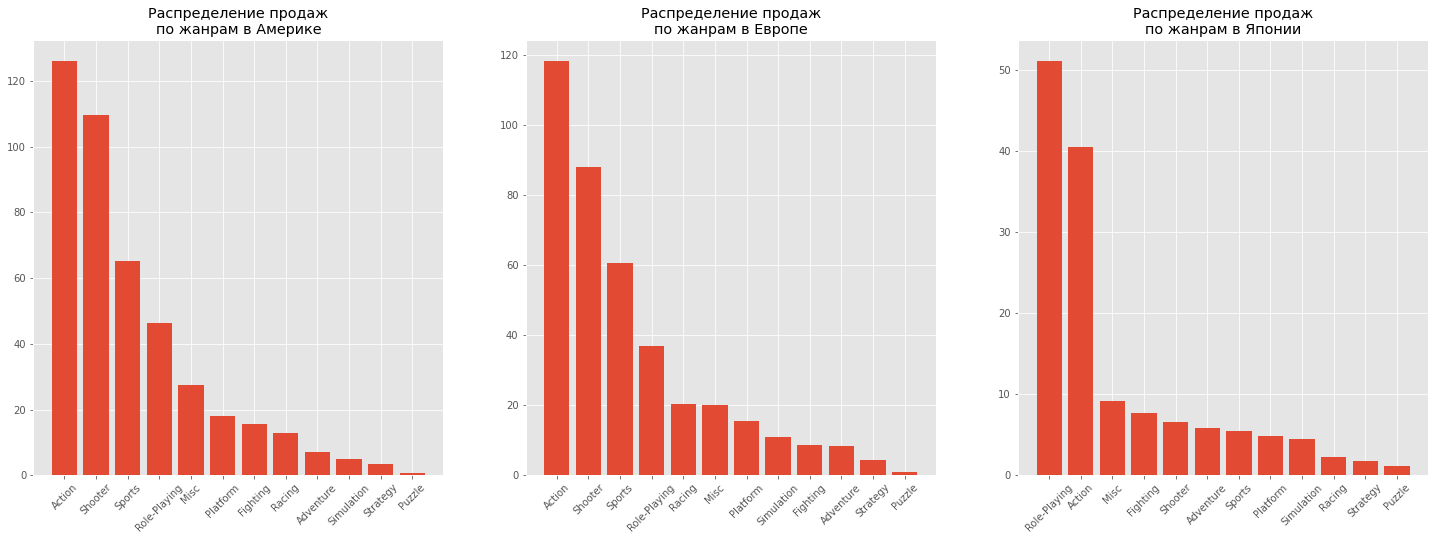

In [45]:
fig, (ax4, ax5, ax6) = plt.subplots(nrows=1, ncols=3, figsize=(25, 8))
    
ax4.bar(na_sales['genre'], na_sales['na_sales'])
ax4.set_title('Распределение продаж\nпо жанрам в Америке')
for tick in ax4.get_xticklabels():
    tick.set_rotation(45)

ax5.bar(eu_sales['genre'], eu_sales['eu_sales'])
ax5.set_title('Распределение продаж\nпо жанрам в Европе')
for tick in ax5.get_xticklabels():
    tick.set_rotation(45)

ax6.bar(jp_sales['genre'], jp_sales['jp_sales'])
ax6.set_title('Распределение продаж\nпо жанрам в Японии')
for tick in ax6.get_xticklabels():
    tick.set_rotation(45)

**Вывод**

Американский и европейский рынки игр распределились по жанрам почти равномерно. В Японии же ТОП заняли относительно неоппулярные ролевые игры.

### Влияние рейтинга на продажи в регионах

In [46]:
# содаём для будущего subplots() сводные таблицы по каждому из регионов
na_sales = actual_df.pivot_table(index='rating', values='na_sales', aggfunc='sum')
na_sales = na_sales.sort_values(by='na_sales', ascending=False).reset_index()

eu_sales = actual_df.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
eu_sales = eu_sales.sort_values(by='eu_sales', ascending=False).reset_index()

jp_sales = actual_df.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
jp_sales = jp_sales.sort_values(by='jp_sales', ascending=False).reset_index()

Text(0.5, 1.0, 'Распределение продаж\nпо жанрам в Японии')

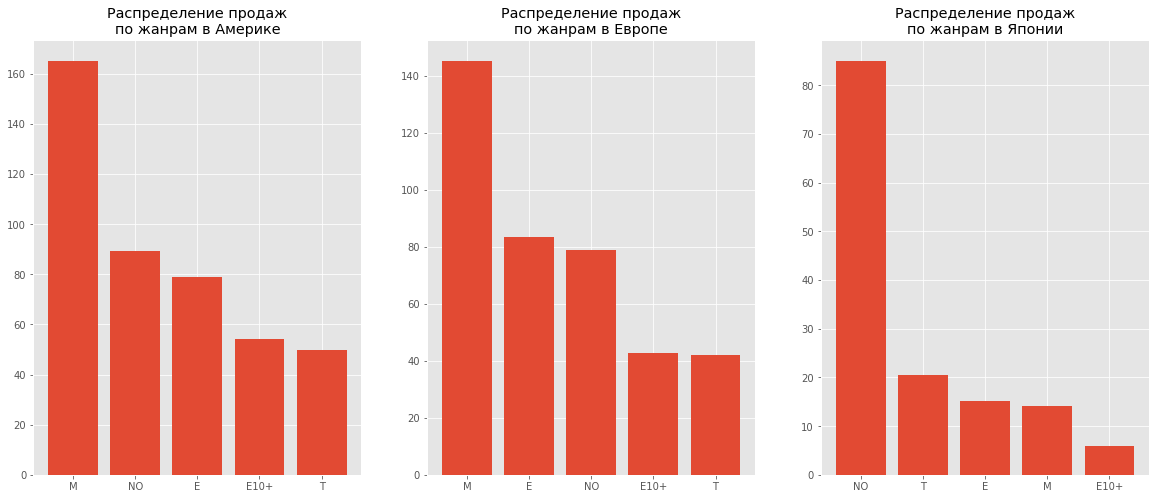

In [47]:
fig, (ax7, ax8, ax9) = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
    
ax7.bar(na_sales['rating'], na_sales['na_sales'])
ax7.set_title('Распределение продаж\nпо жанрам в Америке')

ax8.bar(eu_sales['rating'], eu_sales['eu_sales'])
ax8.set_title('Распределение продаж\nпо жанрам в Европе')

ax9.bar(jp_sales['rating'], jp_sales['jp_sales'])
ax9.set_title('Распределение продаж\nпо жанрам в Японии')

**Вывод**

В распределении продаж по рейтингу европейский и американский рынки так же практически идентичны. В Японии же огромной популярностью пользуются игры без установленного класса рейтинга.

### Портрет американского пользователя

<AxesSubplot:xlabel='platform'>

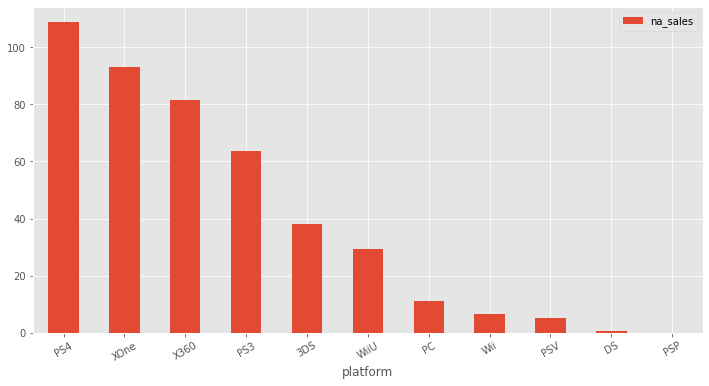

In [48]:
(
    actual_df
    .pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .plot.bar(
    grid=True, 
    figsize=(12, 6),
    rot=30)
)

Платформы американского ТОПа остаются теми же, однако занимают разные позиции. `PS3` и `3DS` были отодвинуты на позиции аутсайдеров.

<AxesSubplot:xlabel='genre'>

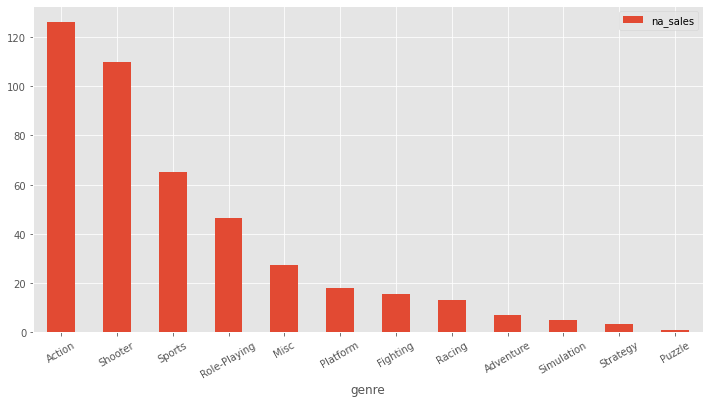

In [49]:
(
    actual_df
    .pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .plot.bar(
    grid=True, 
    figsize=(12, 6),
    rot=30)
)

ТОП американских жанров почти не отличается от глобального топа.

<AxesSubplot:xlabel='rating'>

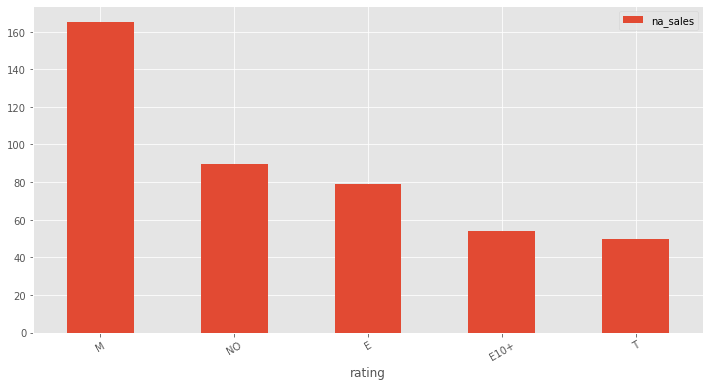

In [50]:
(
    actual_df
    .pivot_table(index='rating', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .plot.bar(
    grid=True, 
    figsize=(12, 6),
    rot=30)
)

Как можем заметить, больше всего игр продаются с `M` ретингом. Следом, почти на равне, оказались игры с рейтингом `E` и без него.

### Портрет европейского пользователя

<AxesSubplot:xlabel='platform'>

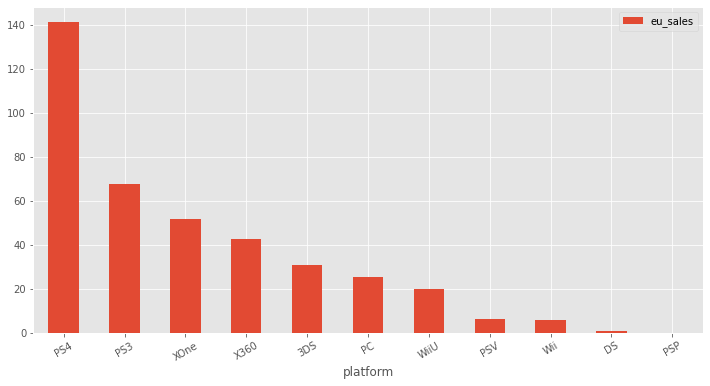

In [51]:
(
    actual_df
    .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .plot.bar(
    grid=True, 
    figsize=(12, 6),
    rot=30)
)

ТОП игровых платформ идентичен глобальному ТОПу, кроме 4 и 5 позиции, которые поменялись местами.

<AxesSubplot:xlabel='genre'>

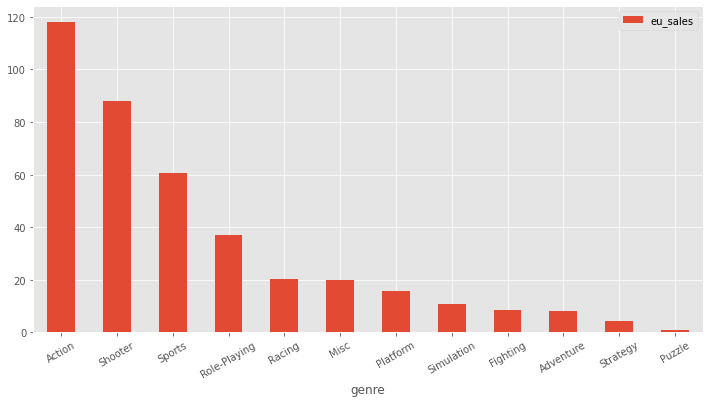

In [52]:
(
    actual_df
    .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .plot.bar(
    grid=True, 
    figsize=(12, 6),
    rot=30)
)

Европейский ТОП жанров так же почти идентичен глобальному. Вместо музыкальных игр, европейцы предпочитают гонки.

<AxesSubplot:xlabel='rating'>

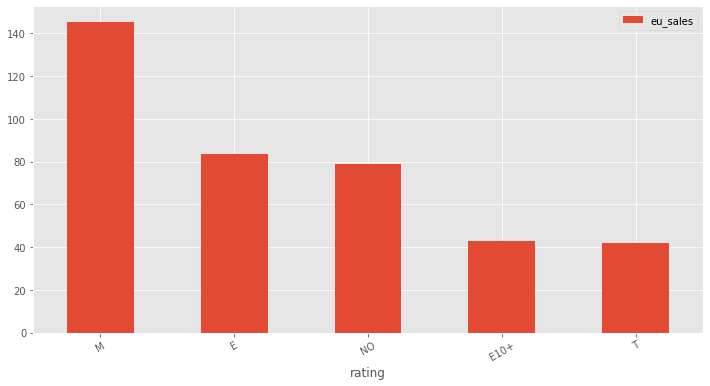

In [53]:
(
    actual_df
    .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .plot.bar(
    grid=True, 
    figsize=(12, 6),
    rot=30)
)

Игры с рейтингом `M` по прежнему лидируют. Картина не сильно отличается от американского портрета.

### Портрет японского пользователя

<AxesSubplot:xlabel='platform'>

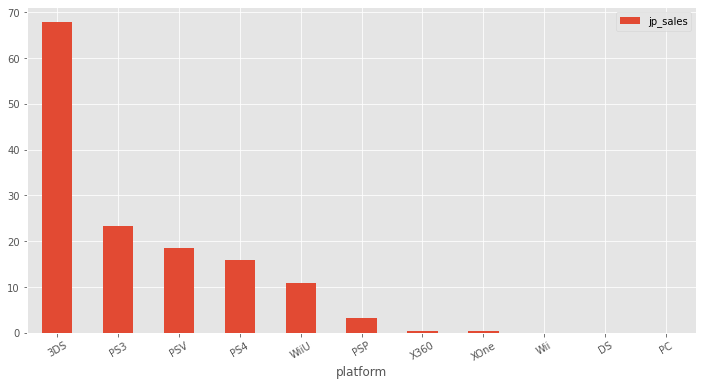

In [54]:
(
    actual_df
    .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .plot.bar(
    grid=True, 
    figsize=(12, 6),
    rot=30)
)

Абсолютно нестандартная картина. На японском рынке игр полностью доминирует платформа `3DS`, оставляя остальные платформы в аутсайдерах.

<AxesSubplot:xlabel='genre'>

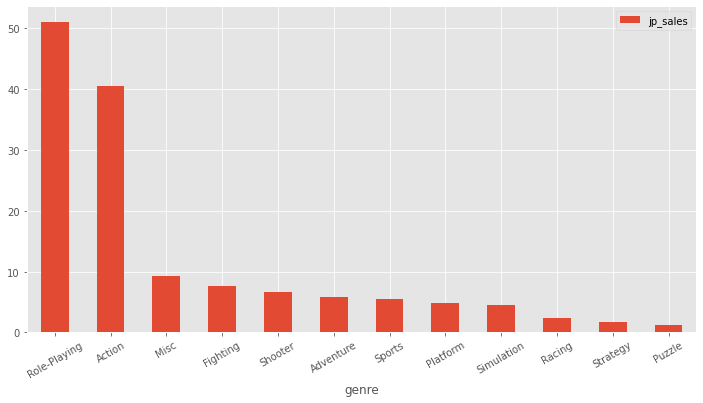

In [55]:
(
    actual_df
    .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .plot.bar(
    grid=True, 
    figsize=(12, 6),
    rot=30)
)

Так же нестандартный ТОП. На японском рынке большую часть рынка забирают себе жанры `Role-Playing` и `Action`, оставляя остальные жанры в относительно глубоком аутсайдерстве.

<AxesSubplot:xlabel='rating'>

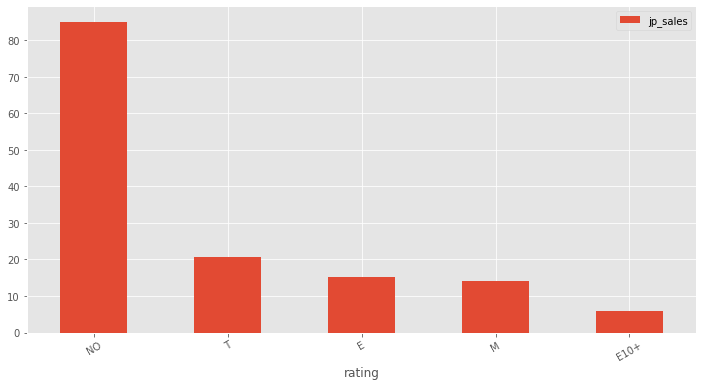

In [56]:
(
    actual_df
    .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .plot.bar(
    grid=True, 
    figsize=(12, 6),
    rot=30)
)

Как мы видим и тут картина совершенно нестандартная. Игры без указанного рейтинга имеют абсолютное преймущество по продажам.

## Проверка гепотез

### Средние пользовательские рейтинги на PC и Xbox One идентичны.

 В качестве критерия оценки возьмём параметр `user_score`, т.е. пользовательский рейтинг игры.
 
 Сформулируем нулевую и альтернативную гипотезу:
 
* *Нулевая гипотеза* гласит, что средние пользовательские рейтинги на платформах *PC* и *Xbox One* практически или польностью идентичны.
 
* *Альтернативная гипотеза* гласит, что средние пользовательские рейтинги на платформах *PC* и *Xbox One* значительно отличаются друг от друга.


In [57]:
# в качестве параметра <alpha>, а именно критического уровня статистической значимости возьмём 5%, т.е. зададим значени 0.05
alpha = .05

# пользовательский рейтинг игр на платформе PC
sample_1 = actual_df.query('platform == "PC"')['user_score']

# пользовательский рейтинг игр на платформе Xbox One
sample_2 = actual_df.query('platform == "XOne"')['user_score']

# проведение t-теста с использованием полученных выборок
result = st.ttest_ind(sample_1,
                     sample_2,
                     equal_var = False)
                     


print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую теорию')
else:
    print('Отвергнуть нулевую теорию не получилось')

p-значение: 0.07111304493995979
Отвергнуть нулевую теорию не получилось


Получив результаты t-теста и p-значение, по последнему можно сказать, что не смотря на различность среднего пользовательского рейтинга в выборках, различие в средних рейтингах можно получить с вероятностью в 7% случайно. Учитывая критический уровень стат.значимости, у нас не получилось отвергнуть нулевую гепотезу.

### Средний пользовательский рейтинг Экшн и спортивных игр различается.

В качестве критерия оценки возьмём параметр `user_score`, т.е. пользовательский рейтинг игры.
 
Сформулируем нулевую и альтернативную гипотезу:
 
* *Нулевая гипотеза* гласит, что средние пользовательские рейтинги *Action* игр равны рейтингам игр жанра *Sports*
 
* *Альтернативная гипотеза* гласит, что средние пользовательские рейтинги *Action* игр сильно отличаются от рейтингов игр жанра *Sports*


In [59]:
# в качестве параметра <alpha>, а именно критического уровня статистической значимости возьмём 5%, т.е. зададим значени 0.05
alpha = .05

# пользовательский рейтинг игр на платформе PC
sample_1 = actual_df.query('genre == "Action"')['user_score']

# пользовательский рейтинг игр на платформе Xbox One
sample_2 = actual_df.query('genre == "Sports"')['user_score']

# проведение t-теста с использованием полученных выборок
result = st.ttest_ind(sample_1,
                     sample_2,
                     equal_var = False)
                     


print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую теорию')
else:
    print('Отвергнуть нулевую теорию не получилось')

p-значение: 2.5023320949469875e-21
Отвергаем нулевую теорию


В результате t-теста мы получили, что статистически, вероятность равенства рейтинга игр двух представленных жанров крайне мал. Учитывая критический уровень стат.значимости, у нас не получилось опровергнуть и отбросить альтернативную гепотезу.

## Вывод

Из проведённого исследования можно сделать несколько выводов и портретов вполне успешного и перспективного продукта:
* Средняя жизнь игровой платформы - 10 лет, не считая *PC*
* Учитывая среднюю жизнь платформы, в ближайшие пару лет можно спокойно делать ставки на платформы `PS4` и `XOne`
* На глобальном рынке сейчас лидирует 5 платформ: `PS4`, `PS3`, `XOne`, `X360` и `3DS`
* Наиболее популярные жанры игр, занимающие почти `80%` рынка: `action`, `shooter`, `sports`, `role-playing`
* Не смотря на меньшие суммарные продажи, шутеры являются вероятностно более прибыльными играми, чем экшны.
* Американский или европейский пользователь не сильно далёк от глобальных 'трендов' игрового мира.
* Японский пользователь - абсолютно нестандартная картина игрового пользователя.
* Наиболее востребованный продукт на глобальном ( как и на европейском/американском рынке ) - Экш-игра на платформе PS4 с ESRB рейтингом M.
* Наиболее востребованный продукт на японском рынке - Роле-Плей игра на платформе Nintendo 3DS без установленного ESRB рейтинга.
* Средний пользовательский рейтинг не зависит от платформы, для одной игры он идентичен на всех платформах.
* Средний рентинг игры может сильно отличатся в зависимости от её жанра.